In [ ]:
# Задачи
# 1. Соберите все данные из папки data в один датафрэйм, 
# имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), 
# а также имя пользователя (name), и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)
# Посчитайте общее количество купленых товаров (quantity).

# 2. Выясните, какой пользователь купил больше всего товаров. Если их несколько, 
# то перечислите имена через запятую с пробелом и в алфавитном порядке.

# 3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. 

# 4. Теперь визуализируйте продажи по дням.
# И выберите верные утверждения:
#   1) 8 и 9 декабря было продано примерно одинаковое число товаров
#   2) Меньше всего товаров было приобретено 6 декабря
#   3) 4 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
#   4) Максимальное число товаров было продано 4 декабря
#   5) 7 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
#   6) 5 декабря было куплено почти в три раза меньше товаров, чем в предыдущий день
#   7) Меньше всего продуктов было приобретено 4 декабря
#   8) 5 декабря было куплено почти в два раза больше товаров, чем в предыдущий день

# 5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 
# Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [3]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.getcwdb()

b'/mnt/HC_Volume_18315164/home-jupyter/jupyter-m.kalachinova-16/Chemidov/Mini_projects'

In [3]:
os.listdir('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m.kalachinova-16/shared/homeworks/python_ds_miniprojects/4/data')

['2020-12-05',
 '2020-12-08',
 '2020-12-09',
 '2020-12-04',
 '2020-12-06',
 '2020-12-03',
 '2020-12-07']

In [4]:
path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-m.kalachinova-16/shared/homeworks/python_ds_miniprojects/4/data'

In [6]:
list(os.walk(path))

[('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m.kalachinova-16/shared/homeworks/python_ds_miniprojects/4/data',
  ['2020-12-05',
   '2020-12-08',
   '2020-12-09',
   '2020-12-04',
   '2020-12-06',
   '2020-12-03',
   '2020-12-07'],
  []),
 ('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m.kalachinova-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05',
  ['Petr_Ivanov',
   'Petr_Smirnov',
   'Rostislav_Smirnov',
   'Kirill_Smirnov',
   'Alexey_Fedorov',
   'Alexey_Petrov'],
  []),
 ('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m.kalachinova-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov',
  [],
  ['data.csv']),
 ('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m.kalachinova-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov',
  [],
  ['data.csv']),
 ('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m.kalachinova-16/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov',
  [],
  ['data.csv']),
 ('/mnt/HC_Volum

In [16]:
# Создаем основной датафрейм для всех данных 
df = pd.DataFrame()

# С помощью цикла проходимся по всем файлам
for current_path, dirs, files in os.walk(path):
    for file in files:
        # Сохраняем полный путь к файлу в переменную
        data_path = (current_path +'/'+ file)
        
        # Считываем данные
        path_df = pd.read_csv(data_path)
        
        # Извлекаем дату и название из списка, который получили из пути к файлу и сохраняем их в переменные
        date = current_path.split('/')[-2]
        name = current_path.split('/')[-1]

        # Добавляем колонки с данными в наших переменных
        path_df['date'] = date
        path_df['name'] = name
        
        # Вставляем данные в основной датафрейм
        df = pd.concat((df, path_df))

#Избавляемся от индексов        
df.drop(columns=['Unnamed: 0'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [21]:
df

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov
...,...,...,...,...
156,18,4,2020-12-07,Petr_Fedorov
157,94,4,2020-12-07,Petr_Fedorov
158,95,2,2020-12-07,Vasiliy_Ivanov
159,83,3,2020-12-07,Vasiliy_Ivanov


In [20]:
#Посчитаем сумму по колонке quantity
df.quantity.sum()

#Ответ: 480

480

In [31]:
#Далее найдем пользователей, купивших больше всего товаров
df.groupby('name', as_index=False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False) \
    .head()

#Ответ: Alexey_Smirnov, Petr_Smirnov

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28


In [33]:
df.head()

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov


In [101]:
# Найдитем топ-10 товаров по числу проданных единиц товаров за всё время. 

top10_products = df.groupby('product_id', as_index=False) \
                    .agg({'quantity': 'sum'}) \
                    .sort_values('quantity', ascending=False) \
                    .head(10)
top10_products

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


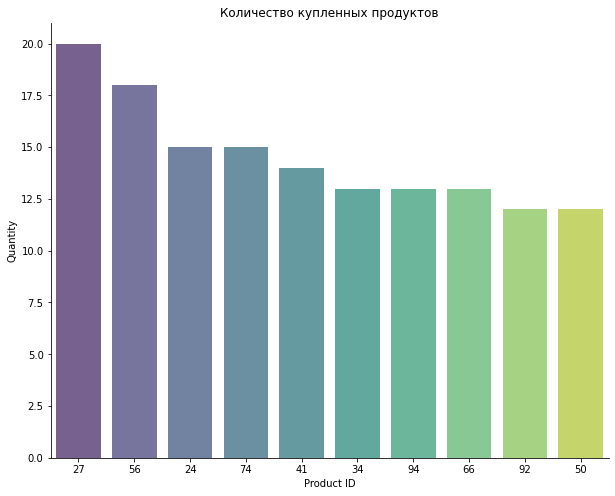

In [100]:
# Теперь построим барплот и отсортируем по количество купленных товаров

plt.figure(figsize=(10, 8))
ax =sns.barplot(data=top10_products, 
            x='product_id', 
            y='quantity',
            palette="viridis",
            alpha = 0.75,
            order=top10_products.sort_values(by=['quantity'], ascending=False).set_index('product_id').index)
ax.set(xlabel='Product ID', ylabel='Quantity')
sns.despine()
plt.title('Количество купленных продуктов')
plt.show()

In [121]:
# Чтобы выбрать верные утерждения, сгрупируем данные по дате.

orders_by_days = df.groupby('date', as_index=False) \
                    .agg({'quantity': 'sum'}) \
                    .sort_values('date')

In [116]:
orders_by_days

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


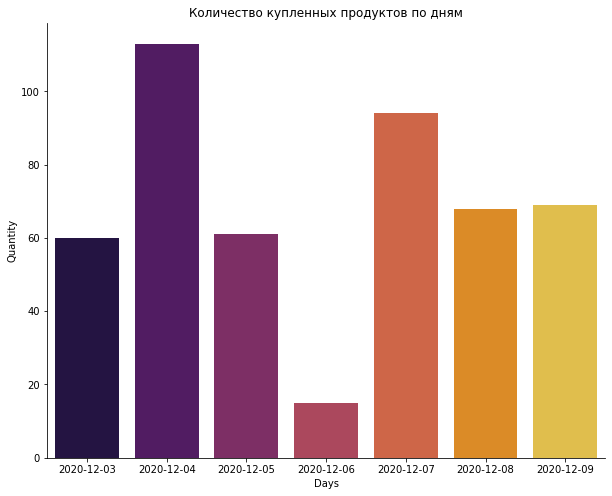

In [122]:
# Визуализируем данные с помощью барплота.
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=orders_by_days,
                 x="date",
                 y="quantity",
                 palette="inferno")
ax.set(xlabel='Days', ylabel='Quantity')
sns.despine()
plt.title('Количество купленных продуктов по дням')
plt.show()

# Теперь посмотрим на график и выберем верные утверждения по заданию:
#  1) 8 и 9 декабря было продано примерно одинаковое число товаров
#  2) Меньше всего товаров было приобретено 6 декабря
#  3) 4 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
#  4) Максимальное число товаров было продано 4 декабря
#  5) 7 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
#  6) 5 декабря было куплено почти в три раза меньше товаров, чем в предыдущий день
#  7) Меньше всего продуктов было приобретено 4 декабря
#  8) 5 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
# Ответ: 1, 2, 3, 4

In [129]:
# 5. Узнаем, сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 
# Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

df.groupby(['name', 'product_id'], as_index=False) \
    .agg({'date': pd.Series.nunique}) \
    .query('date > 1')

# Ответ: 2 пользователя (Anton_Ivanov и Petr_Fedorov)

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2


In [ ]:
# Дополнительный задание (небольшой минипроект на фильтрацию данных!)

# Имеется таблица с записями о компаниях, включая их ИНН, и отдельный текстовый файл с набором ИНН (колонка head_inn),
# которые хранятся в папке 4_inn.

# inn.xls — таблица в экселевском формате
# necessary_inn.txt — перечень необходимых ИНН в текстовом формате
# Задачи:
# извлечь из таблицы записи с ИНН, указанными в текстовом файле
# записать результат в файл selected_inn.csv

In [11]:
path2 = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-m.kalachinova-16/shared/homeworks/python_ds_miniprojects/4_inn/'

In [12]:
os.listdir(path2)

['inn.xls', 'necessary_inn.txt']

In [13]:
inn = pd.read_excel(path2 + 'inn.xls', index_col=0)

In [14]:
inn.head()

,#,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
0,0,"ЗАО «Власова, Макаров и Шашков»",1143692580560,"д. Кирово-Чепецк, пр. Металлургов, д. 537 к. 3...",Жданов Карл Виленович,Маммолог,109092209811,+7 (559) 338-87-76,bogdanovavtonom@yahoo.com,ooo.info,2015-01-07,2006-10-04,21112877268,73423615032,Ulan-Ude,"к. Тосно, ул. Пушкинская, д. 896, 617222",Синхронизация критически важных отношений,54875526078,32205872896
1,1,"РАО «Тимофеева, Алексеева и Кузнецова»",9342309660697,"г. Арзамас, наб. Фестивальная, д. 7 стр. 8/2, ...",Рожков Харлампий Алексеевич,Воспитатель,704229465069,8 (632) 620-8879,safonovantonin@rao.org,ooo.net,1990-05-16,2019-01-18,18393547520,19072454279,Tyoply Stan,"ст. Кяхта, бул. Нефтяников, д. 24, 768742",Формирование заказных методик,33876448811,47437574301
2,2,РАО «Юдин-Ефимова»,1277485323451,"п. Меренга, алл. Достоевского, д. 3/4 к. 497, ...",Филимон Фадеевич Дьячков,Автослесарь,267655036377,+74925330378,kdorofeev@npo.ru,ao.com,1982-11-04,1986-06-19,56104355836,18629292792,Danilov,"клх Усолье Сибирское, алл. Шишкина, д. 3/9 к. ...",Максимизация корпоративных метрик,94073834991,7701710065
3,3,Доронин Инкорпорэйтед,7139161431511,"д. Иваново, ул. Красных Партизан, д. 83 к. 4, ...",Крылов Глеб Якубович,Тюремный надзиратель,362024991175,+7 118 643 21 48,nkulakova@mail.ru,ooo.ru,2005-01-02,2004-04-06,10398489351,32502585383,Beryozovsky,"г. Заводоуковск, ул. Гражданская, д. 7 к. 8/5,...",Разработка ориентированных на пользователя инт...,86971505490,61148002572
4,4,Объединенная энергетическая компания,6114798049639,"к. Энгельс, наб. Шишкина, д. 120, 823828",Субботин Вячеслав Федотович,Инженер-электрик,257948948010,8 642 249 2134,evgraf_18@yahoo.com,gerasimova.biz,1983-07-02,1992-06-20,20074507047,40083207999,Bavly,"к. Соль-Илецк, пер. Пригородный, д. 804 к. 1/3...",Монетизация интуитивных веб-сервисов,36351136214,34861533393


In [15]:
f = open(path2 + 'necessary_inn.txt')

In [17]:
f.read()

'394609645484\n281578625230\n923769811917\n998694734508\n271011690615\n924952812367\n646685244561\n581531230312\n841967395801\n962179889311\n873191383820\n590538076039\n194319975048\n614658394086\n571270160555\n609400911893\n595260069852\n706966142477\n173050718969\n968048428696\n806967744814\n575198252501\n283081417246\n663119569897\n600958529354\n280452832937\n415557497037\n195142638722\n472181033836\n722903871682\n442387408954\n196518820495\n653798670054\n126259856639\n175482780898\n192518356612\n817648134701\n321724220657\n864970037680\n822991191528\n205472219644\n532801459453\n657038381012\n197916669463\n849814898285\n617082656257\n500480544925\n765833725639\n263518962896\n415856290529\n812729265571\n688172366656\n837771137752\n456294893364\n668157292633\n491435460276\n323896131459\n664667769879\n293128896936\n833493884251\n120708914823\n860475372268\n172328288163\n452188261986\n818829342640\n948029225406\n310163740295\n973834903297\n499074920916\n124852843647\n172587252836\n27081